In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from scipy.cluster import hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250

##  Problem Statement  
Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. 

In [2]:
df = pd.read_csv(r"C:\Users\Shivani Kharade\Desktop\DS ExcelR\Assignments\Clustering\EastWestAirlines.csv")

In [3]:
df1 = df.copy()

In [4]:
df1.head(14)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
5,6,16420,0,1,1,1,0,0,0,0,6942,0
6,7,84914,0,3,1,1,27482,25,0,0,6994,0
7,8,20856,0,1,1,1,5250,4,250,1,6938,1
8,9,443003,0,3,2,1,1753,43,3850,12,6948,1
9,10,104860,0,3,1,1,28426,28,1150,3,6931,1


In [5]:
df1_norm = preprocessing.scale(df1)

In [6]:
df1_norm = pd.DataFrame(df1_norm)

In [7]:
df1_norm.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11
0,-1.735125,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919
1,-1.734263,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919
2,-1.733402,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,-0.766919
3,-1.732540,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,-0.766919
4,-1.731679,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975,1.303918
5,-1.730817,-0.567483,-0.186299,-0.769578,-0.098242,-0.062767,-0.709992,-1.208203,-0.328603,-0.362168,1.367365,-0.766919
6,-1.729955,0.112270,-0.186299,0.683121,-0.098242,-0.062767,0.428076,1.395256,-0.328603,-0.362168,1.392549,-0.766919
7,-1.729094,-0.523459,-0.186299,-0.769578,-0.098242,-0.062767,-0.492582,-0.791649,-0.150036,-0.098503,1.365428,1.303918
8,-1.728232,3.666042,-0.186299,0.683121,6.675367,-0.062767,-0.637398,3.269747,2.421330,2.801807,1.370271,1.303918
9,-1.727371,0.310220,-0.186299,0.683121,-0.098242,-0.062767,0.467168,1.707671,0.492805,0.428826,1.362038,1.303918


## Clusters 

In [8]:
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, random_state = 42)
    kmeans.fit(df1_norm)
    wcss.append(kmeans.inertia_)

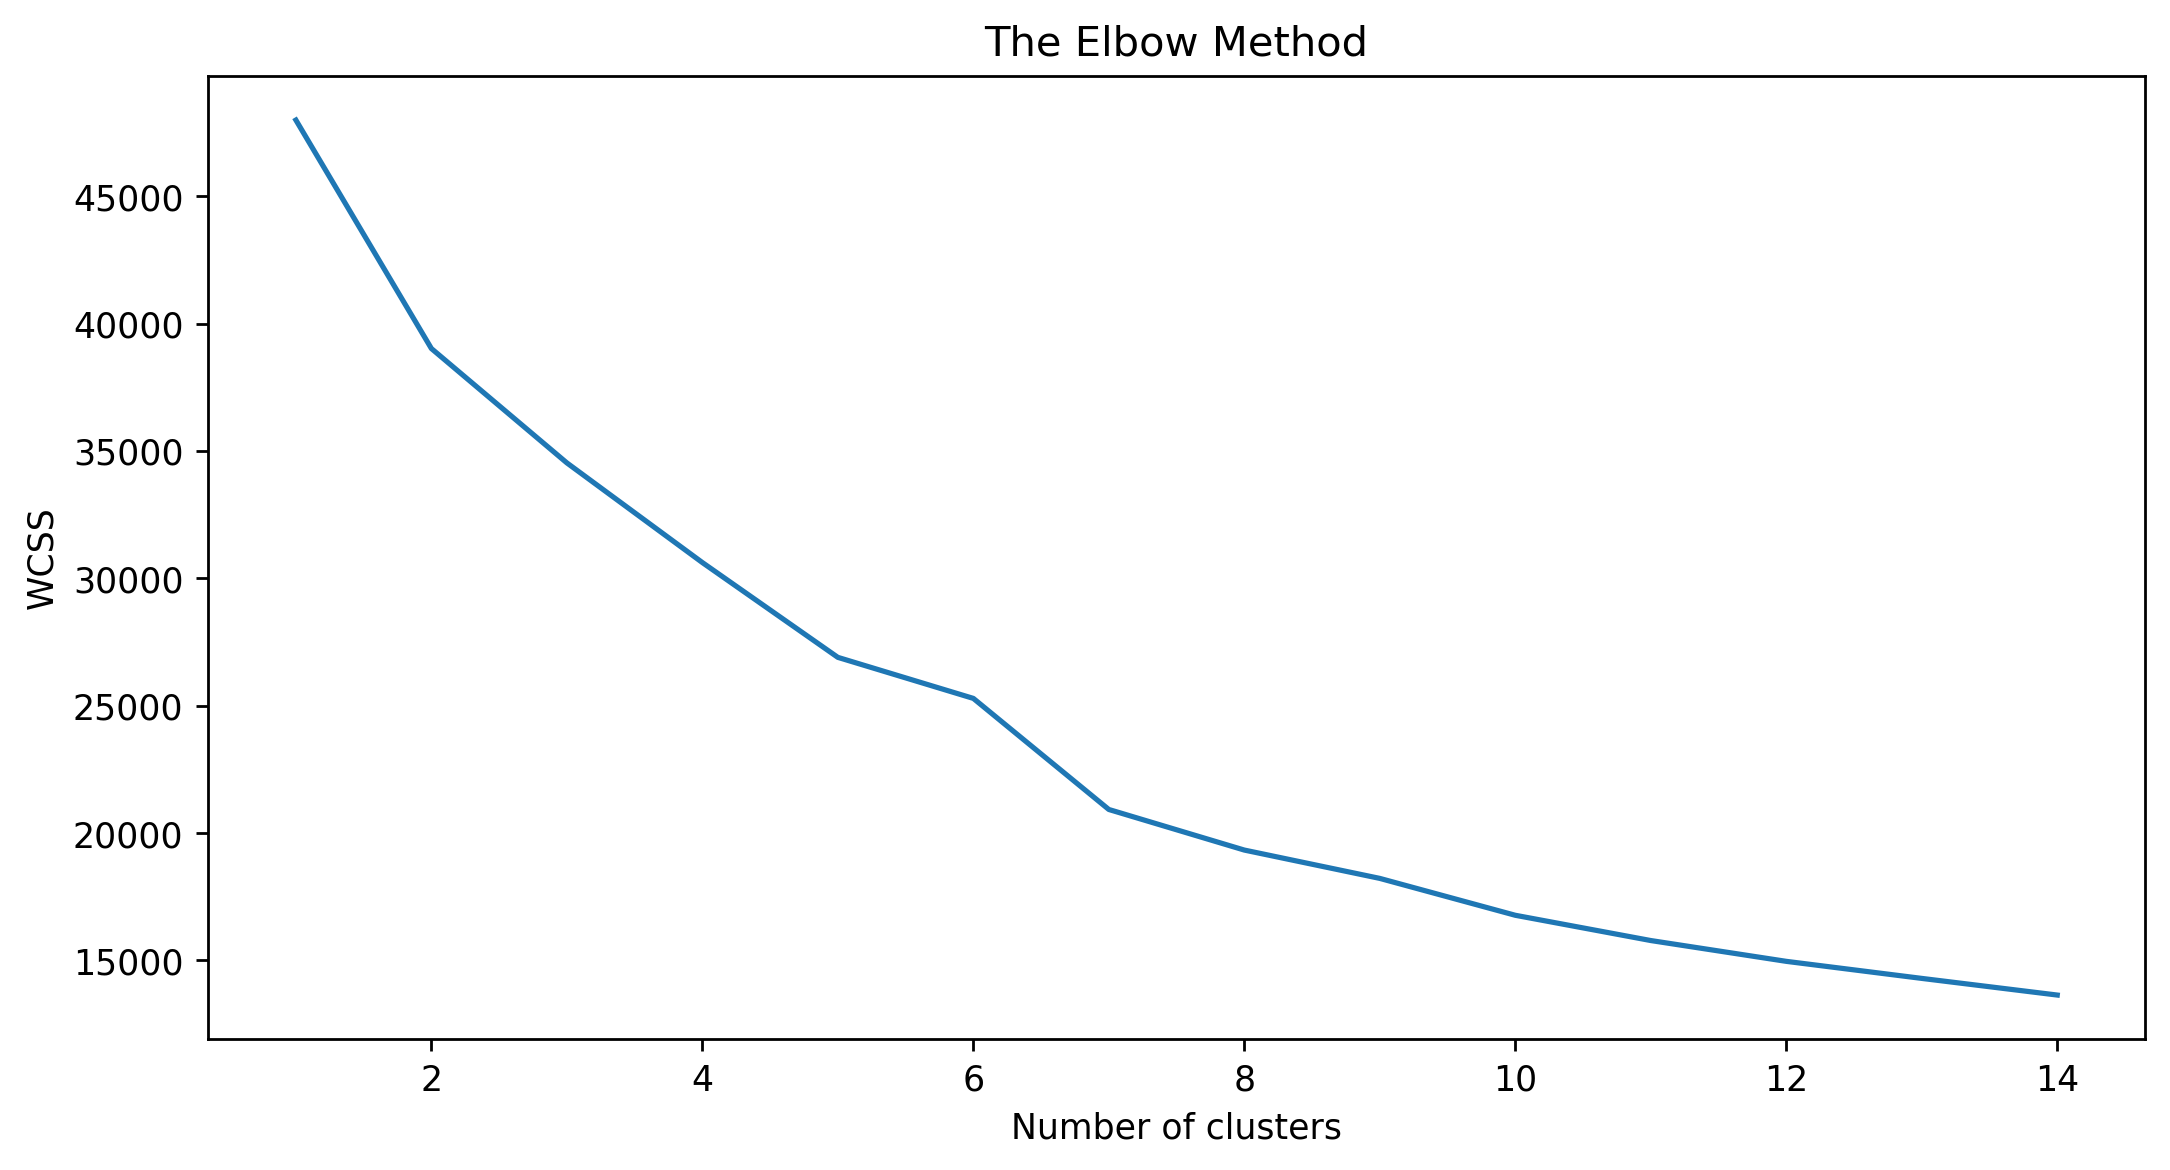

In [9]:
plt.plot(range(1, 15), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

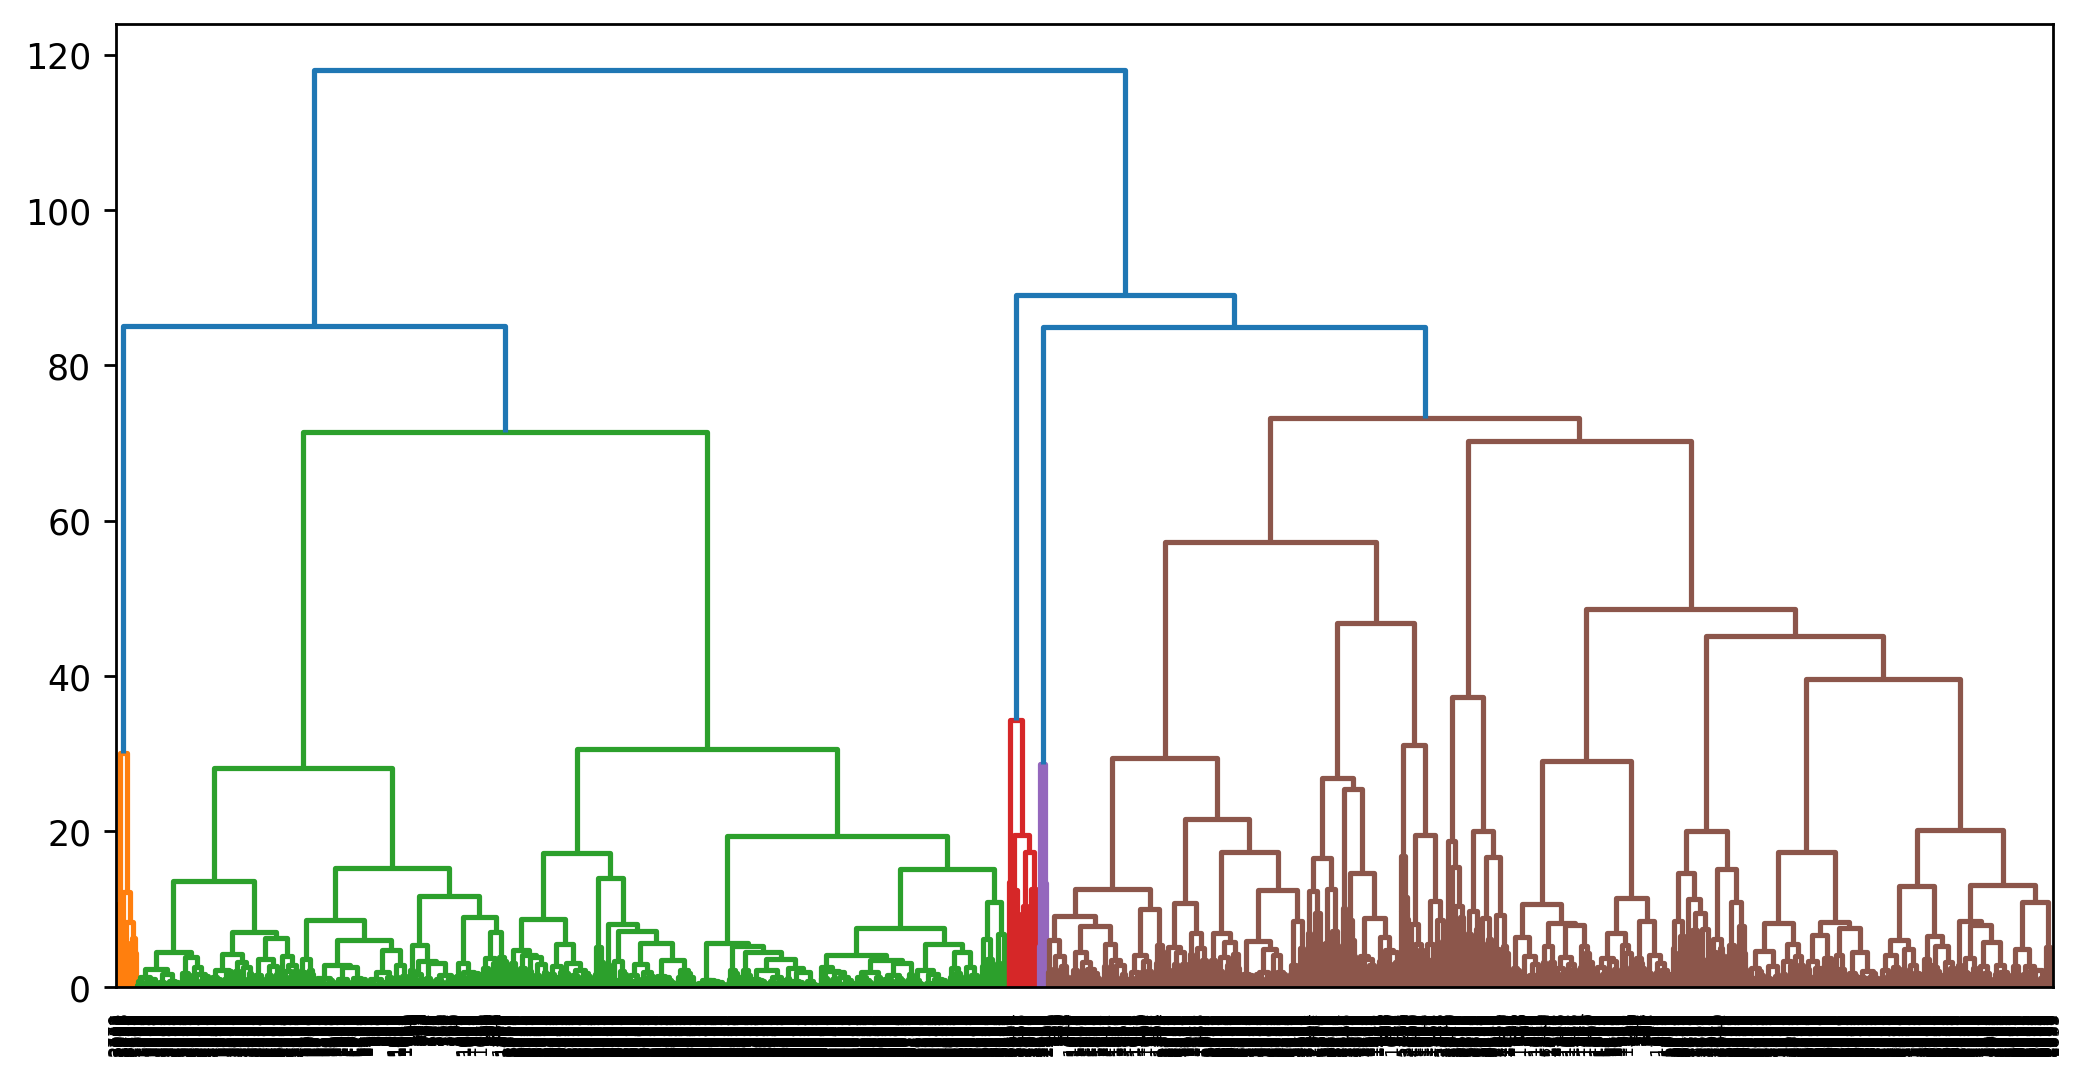

In [10]:
dendrogram = sch.dendrogram(sch.linkage(df1_norm, method='ward'))

In [11]:
X = df1_norm.values

In [12]:
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')

In [13]:
h_cluster = model.fit(X)

In [14]:
labels = model.labels_

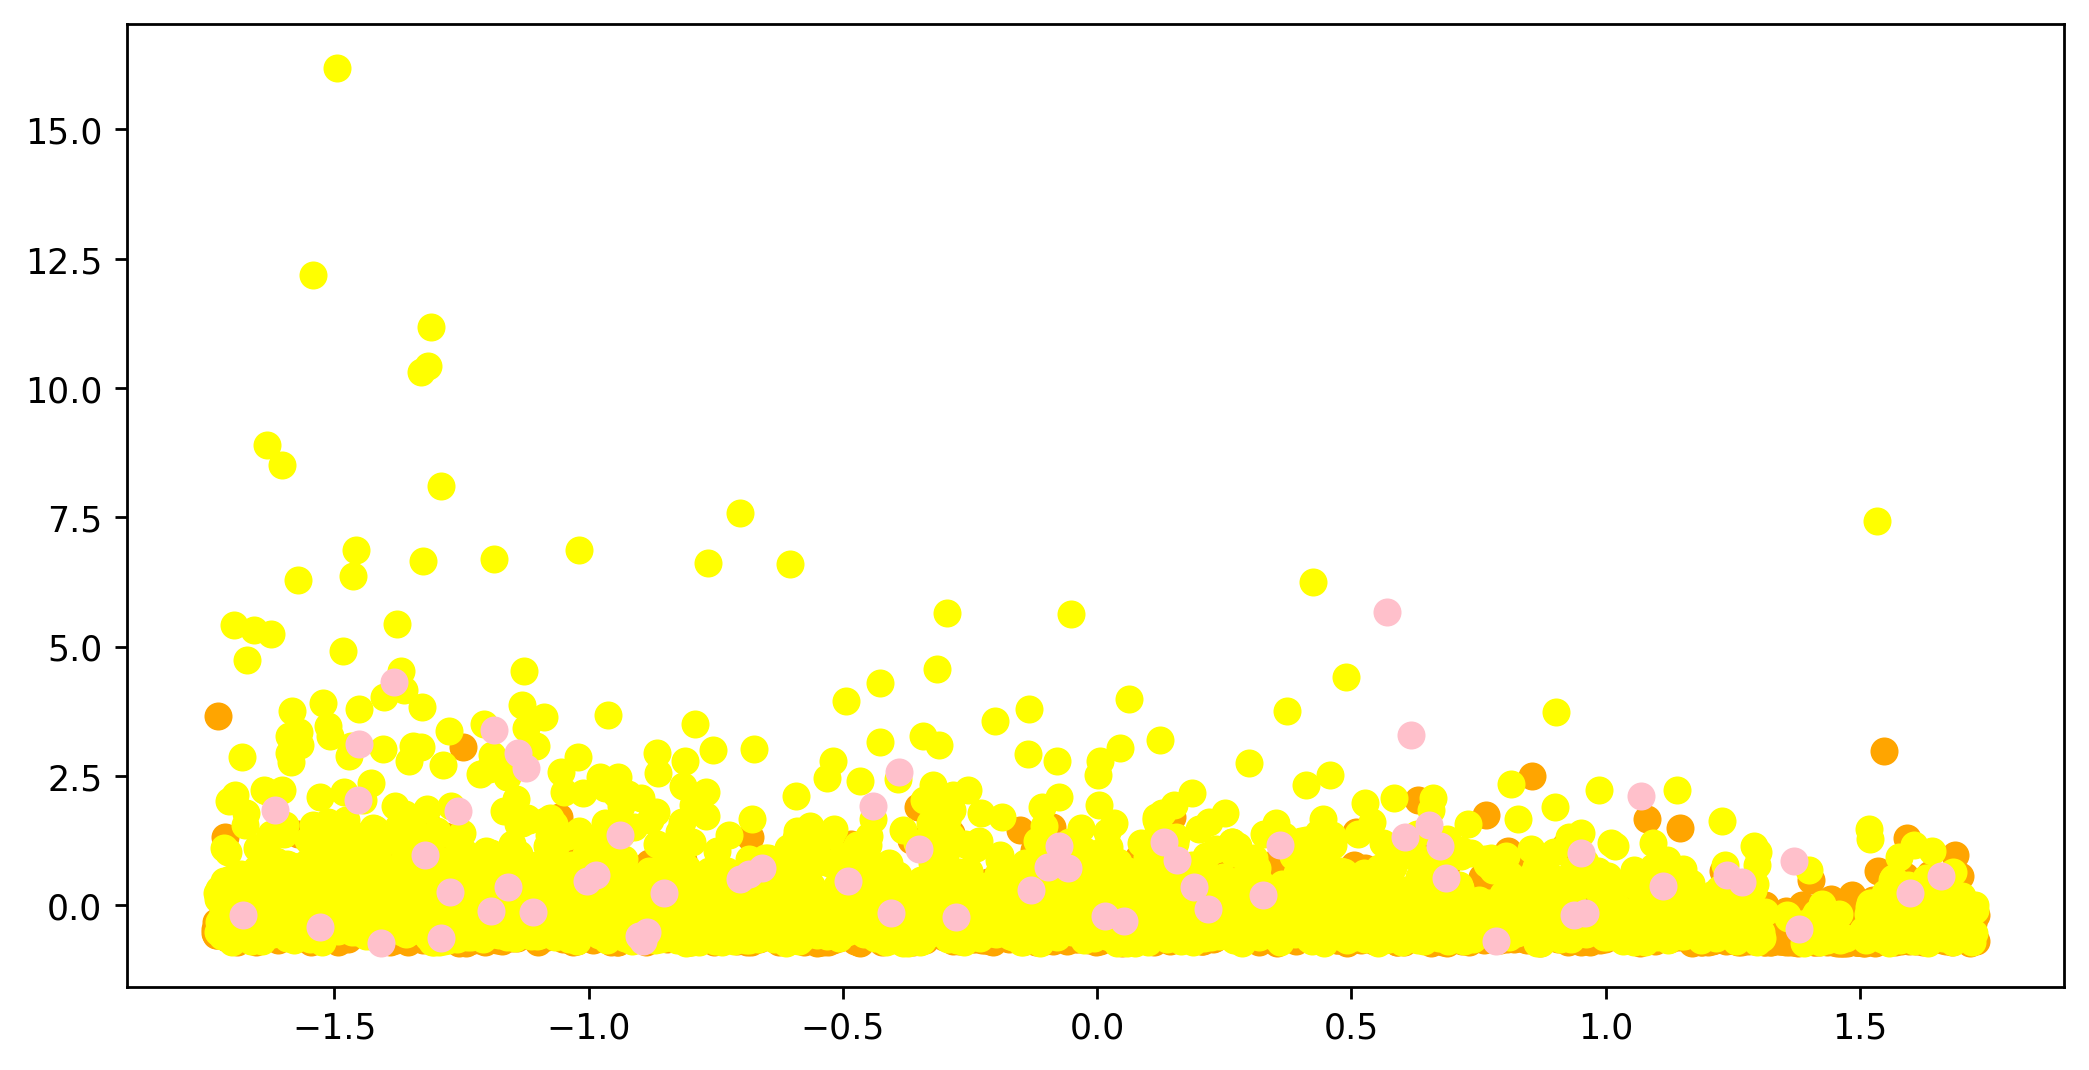

In [15]:
plt.scatter(X[labels==0, 0], X[labels==0, 1], s=50, marker='o', color='orange')
plt.scatter(X[labels==1, 0], X[labels==1, 1], s=50, marker='o', color='yellow')
plt.scatter(X[labels==2, 0], X[labels==2, 1], s=50, marker='o', color='pink')

## K Means

In [16]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
k_means = kmeans.fit_predict(df1_norm)

In [17]:
k_means

array([0, 0, 0, ..., 0, 0, 0])

In [18]:
k_means1=k_means+1
k_cluster = list(k_means1)

In [19]:
df1['k_cluster'] = k_cluster

In [20]:
kmeans_mean_cluster = pd.DataFrame(round(df1.groupby('k_cluster').mean(),1))

In [21]:
kmeans_mean_cluster

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
k_cluster,,,,,,,,,,,,
1,2327.1,42243.6,91.1,1.2,1.0,1.0,4896.4,7.0,194.4,0.6,3549.8,0.2
2,1445.6,119557.7,165.6,3.6,1.0,1.0,38921.2,18.6,351.2,1.1,5147.4,0.6
3,1753.1,189304.2,788.7,2.2,1.0,1.0,31780.5,27.1,5420.4,15.8,4657.0,0.8


In [22]:
pd.DataFrame(round(df1.groupby('k_cluster').count(),1))

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
k_cluster,,,,,,,,,,,,
1,2525,2525,2525,2525,2525,2525,2525,2525,2525,2525,2525,2525
2,1310,1310,1310,1310,1310,1310,1310,1310,1310,1310,1310,1310
3,164,164,164,164,164,164,164,164,164,164,164,164


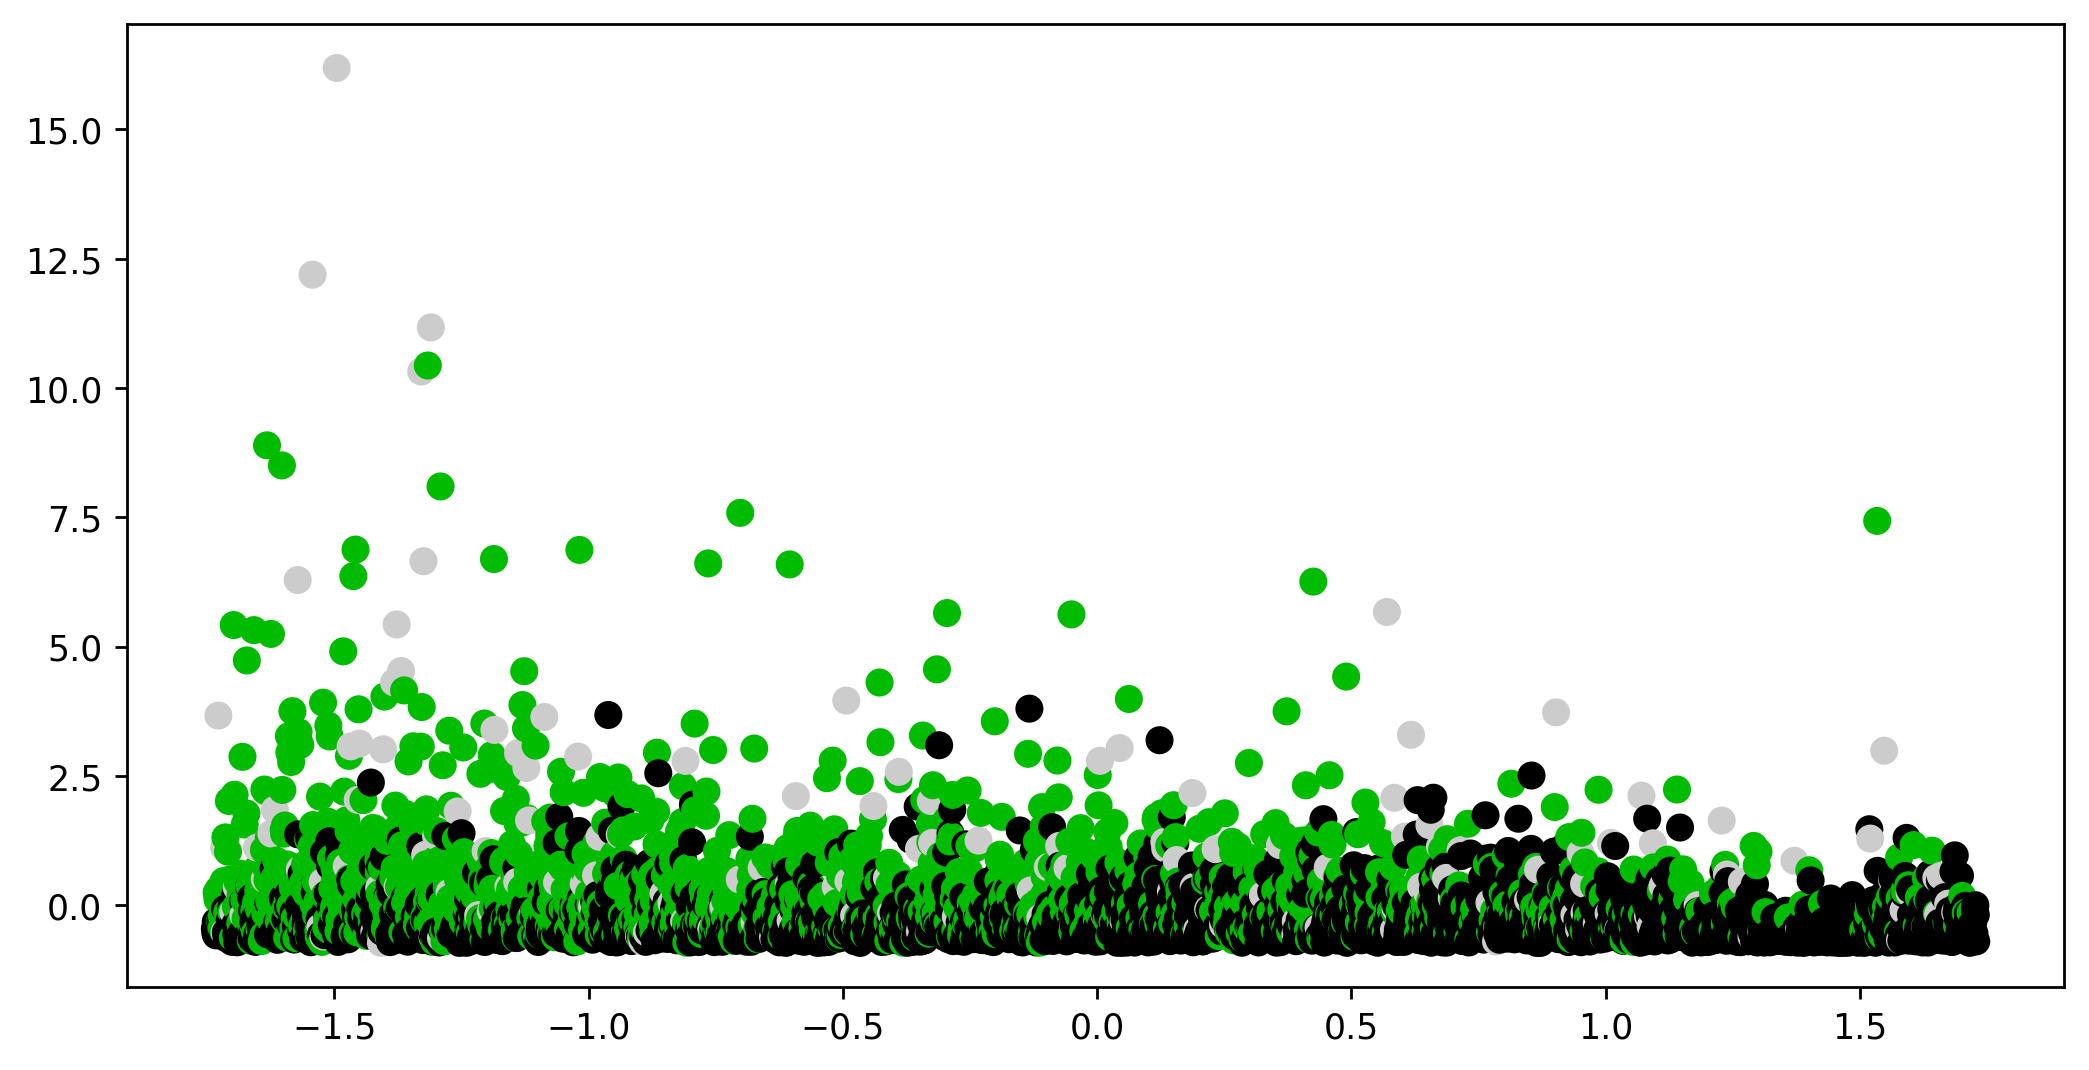

In [23]:
plt.scatter(X[:, 0], X[:, 1], c=k_means, s=50, cmap='nipy_spectral')

## Conclusion

The Cluster-1 has around 63% total travelers and Cluster-2 has 33% of the travelers. We will target Cluster 1 & 2. Cluster 1 contains less frequent or first time travellers, by giving them discount provided they travel more than twice or thrice and introduce more offer if they register or take the membership.